Q1. This data set contains details of a houses and the target variable is a continuous variable.
Dataset contains input features and predicting house prices. Apply necessary data preprocessing -
Construct Naïve Bayes Model using dependent variable to predict house prices based on given
data using Jupyter Notebook. Use area, bedrooms, Bathrooms. Stories, Basement, Hot water
heating, Air conditioning, parking, Furnishing status.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('./SET 24-1.csv')
print(dataset)

    basement hotwaterheating furnishingstatus     price  area  bedrooms  \
0         no              no        furnished  13300000  7420         4   
1         no              no        furnished  12250000  8960         4   
2        yes              no   semi-furnished  12250000  9960         3   
3        yes              no        furnished  12215000  7500         4   
4        yes              no        furnished  11410000  7420         4   
..       ...             ...              ...       ...   ...       ...   
540      yes              no      unfurnished   1820000  3000         2   
541       no              no   semi-furnished   1767150  2400         3   
542       no              no      unfurnished   1750000  3620         2   
543       no              no        furnished   1750000  2910         3   
544       no              no      unfurnished   1750000  3850         3   

     bathrooms airconditioning  parking  stories guestroom prefarea mainroad  
0            2      

In [6]:
dataset.isnull().sum()

basement            0
hotwaterheating     0
furnishingstatus    0
price               0
area                0
bedrooms            0
bathrooms           0
airconditioning     0
parking             0
stories             0
guestroom           0
prefarea            0
mainroad            0
dtype: int64

In [8]:
dataset['airconditioning'].replace(['yes','no'],[1,0],inplace=True)
dataset['basement'].replace(['yes','no'],[1,0],inplace=True)
dataset['hotwaterheating'].replace(['yes','no'],[1,0],inplace=True)
dataset['furnishingstatus'].replace(['furnished','semi-furnished','unfurnished'],[2,1,0],inplace=True)

In [9]:
print(dataset)

     basement  hotwaterheating  furnishingstatus     price  area  bedrooms  \
0           0                0                 2  13300000  7420         4   
1           0                0                 2  12250000  8960         4   
2           1                0                 1  12250000  9960         3   
3           1                0                 2  12215000  7500         4   
4           1                0                 2  11410000  7420         4   
..        ...              ...               ...       ...   ...       ...   
540         1                0                 0   1820000  3000         2   
541         0                0                 1   1767150  2400         3   
542         0                0                 0   1750000  3620         2   
543         0                0                 2   1750000  2910         3   
544         0                0                 0   1750000  3850         3   

     bathrooms  airconditioning  parking  stories guestroom pre

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   basement          545 non-null    object
 1   hotwaterheating   545 non-null    object
 2   furnishingstatus  545 non-null    object
 3   price             545 non-null    int64 
 4   area              545 non-null    int64 
 5   bedrooms          545 non-null    int64 
 6   bathrooms         545 non-null    int64 
 7   airconditioning   545 non-null    object
 8   parking           545 non-null    int64 
 9   stories           545 non-null    int64 
 10  guestroom         545 non-null    object
 11  prefarea          545 non-null    object
 12  mainroad          545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


area, bedrooms, Bathrooms. Stories, Basement, Hot water heating, Air conditioning, parking, Furnishing status

In [10]:
X = dataset.iloc[:,[0,1,2,4,5,6,7,8]].values
Y = dataset.iloc[:,3].values

In [11]:
print(X)

[[0 0 2 ... 2 1 2]
 [0 0 2 ... 4 1 3]
 [1 0 1 ... 2 0 2]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 2 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [12]:
print(Y)

[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510000  6510000  6510000  6475000
  6475000  6440000  6440000  6419000  6405000  6300000  6300000  6300000
  6300000  6300000  6293000  6265000  6230000  6230000  6195000  6195000
  6195000  6160000  6160000  6125000  6107500  6090

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=42)

In [14]:
print(X_train)

[[0 0 1 ... 2 1 2]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 1 2 ... 2 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 2 1 1]]


In [15]:
print(X_test)

[[1 0 0 ... 2 0 1]
 [0 0 2 ... 2 1 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


In [16]:
print(Y_train)

[ 5285000  3675000  4200000  2275000  3570000  4620000  4200000  3087000
  3255000  8855000  3640000  7343000  4690000  4305000  3640000  4403000
  4270000  2940000  4795000  8540000  4235000  7700000  3500000  3360000
  4970000  3150000  5530000  5880000  3710000  3640000  8400000  6083000
  4760000  3080000  5243000  7245000  4550000  8575000  8960000  3500000
  6930000  4613000  4340000  4473000  3780000  6300000  5215000  5040000
  4515000  8645000  2660000  3118850  2450000 10850000  6020000  7560000
  4123000  4098500  9100000  7455000  4900000  3423000 12215000  4382000
  3850000  7140000  4970000  2380000  6090000  3710000  4200000  8400000
  4620000  4900000  8463000 10150000  5215000  7420000  6107500  7980000
  5495000  2450000  5950000  3465000  6020000  2450000  4900000  5250000
  3605000  4690000  5600000  5005000  3360000  3290000  4543000  4200000
  3395000  2653000  5652500  3395000  6895000  4270000  4690000  5250000
  5075000  3990000  3325000  2695000  5033000  6615

In [17]:
print(Y_test)

[ 4060000  6650000  3710000  6440000  2800000  4900000  5250000  4543000
  2450000  3353000 10150000  2660000  3360000  3360000  2275000  2660000
  2660000  7350000  2940000  2870000  6720000  5425000  1890000  5250000
  4193000 12250000  3080000  5110000  9800000  2520000  6790000  3500000
  6650000  2940000  3325000  4200000  4900000  3290000  3500000  2380000
  5495000  3675000  6650000  4907000  3150000  4480000  6580000  5740000
  3003000  1820000  8400000  2450000  4270000  4007500  3234000  1750000
  9800000  2100000  4340000  3045000  3850000  3500000  4753000  3080000
  4550000  6510000  6685000  5110000  4550000  6650000  3640000  5600000
  3780000  6615000  3220000  6650000  4690000  4830000  6860000  2233000
  7035000  4165000  6195000  6510000  1890000  8190000  2660000  4193000
 13300000  9681000  4340000  8645000  3703000  5145000  6440000  5950000
  5810000  5740000  6230000  5600000  3010000  8890000  4900000  5530000
  9100000  3773000  7910000  7350000  5530000  7525

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train) 
x_test = sc.fit_transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [20]:
Y_pred = gnb.predict(X_test)

In [21]:
print(Y_pred)

[5600000 6195000 3605000 4130000 3220000 2730000 5873000 6083000 2100000
 2380000 5250000 3255000 2653000 4235000 2450000 3885000 2380000 4830000
 3150000 3675000 2653000 4130000 2870000 3395000 4795000 4970000 2450000
 3885000 4760000 2380000 6160000 2100000 7560000 4235000 2870000 7350000
 6475000 3290000 2653000 3885000 5873000 2653000 6195000 3220000 3675000
 7070000 7560000 3010000 2730000 3150000 7420000 2100000 3500000 4130000
 2450000 2380000 6195000 2870000 4130000 3255000 3570000 3430000 4760000
 6160000 4403000 3780000 6083000 2450000 3500000 6475000 3430000 4235000
 3500000 6930000 4270000 9240000 4403000 4095000 7070000 6160000 7700000
 4403000 6083000 5880000 2870000 7420000 2485000 4403000 3773000 4970000
 3850000 4760000 3675000 4550000 6083000 5460000 4130000 6195000 2730000
 4893000 4403000 7350000 2485000 3885000 4970000 4480000 7560000 7560000
 6083000 7560000 6020000 3395000 2450000 2485000 4410000 2485000 2870000
 2485000 4235000 3080000 2730000 4830000 4235000 44

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [26]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


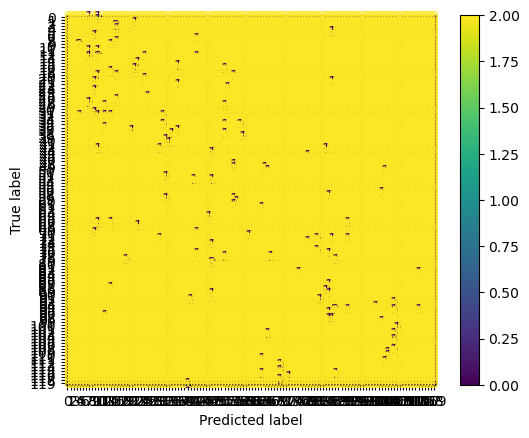

In [27]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [30]:
print('Accuracy:%.2f' % (accuracy_score(Y_test, Y_pred)*100))

Accuracy:0.73


In [32]:
import pickle
print("[Info] Saving Model")
saving_model = pickle.dump(gnb,open('linearmodel.pkl','wb'))
model = pickle.load(open('./linearmodel.pkl','rb'))
model.predict(X_test)

[Info] Saving Model


array([5600000, 6195000, 3605000, 4130000, 3220000, 2730000, 5873000,
       6083000, 2100000, 2380000, 5250000, 3255000, 2653000, 4235000,
       2450000, 3885000, 2380000, 4830000, 3150000, 3675000, 2653000,
       4130000, 2870000, 3395000, 4795000, 4970000, 2450000, 3885000,
       4760000, 2380000, 6160000, 2100000, 7560000, 4235000, 2870000,
       7350000, 6475000, 3290000, 2653000, 3885000, 5873000, 2653000,
       6195000, 3220000, 3675000, 7070000, 7560000, 3010000, 2730000,
       3150000, 7420000, 2100000, 3500000, 4130000, 2450000, 2380000,
       6195000, 2870000, 4130000, 3255000, 3570000, 3430000, 4760000,
       6160000, 4403000, 3780000, 6083000, 2450000, 3500000, 6475000,
       3430000, 4235000, 3500000, 6930000, 4270000, 9240000, 4403000,
       4095000, 7070000, 6160000, 7700000, 4403000, 6083000, 5880000,
       2870000, 7420000, 2485000, 4403000, 3773000, 4970000, 3850000,
       4760000, 3675000, 4550000, 6083000, 5460000, 4130000, 6195000,
       2730000, 4893

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")
prediction = gnb.predict(X_test)[0]
print(f"Predicted price: {prediction:.2f}")

Mean Squared Error: 3445980349434.31
R-Squared: 0.25
Predicted price: 5600000.00
